In [5]:
!ls

reddit_posts_swingers_201503.csv  swingers-analysis.ipynb


Google BigQuery
```
SELECT author, num_comments, score, ups, downs, gilded, created_utc FROM [fh-bigquery:reddit_posts.full_corpus_201509] 
WHERE created BETWEEN 1425168000 AND 1427846400
AND subreddit = 'Swingers'
```

In [6]:
!pip install bokeh
import pandas as pd
import seaborn as sns
from bokeh.charts import TimeSeries, output_file, show

%matplotlib inline

In [7]:
posts_df = pd.DataFrame.from_csv("reddit_posts_swingers_201503.csv")

In [8]:
posts_df[0:5]

,num_comments,score,ups,downs,gilded,created_utc
author,,,,,,
sckurvee,2,3,3,0,0,1425440343
mattandbianca,6,1,1,0,0,1427207934
Ullah_86,3,3,3,0,0,1425891025
Blight_Dragon,11,12,12,0,0,1427082554
[deleted],8,1,1,0,0,1425940046


In [9]:
posts_df['created'] = pd.to_datetime(posts_df.created_utc, unit='s')
posts_df['created_date'] = posts_df.created.dt.date

In [10]:
posts_df['downs'] = posts_df.score - posts_df.ups

In [11]:
posts_time_ups = posts_df.set_index('created_date').ups.sort_index()
posts_time_ups[0:5]

created_date
2015-03-01     5
2015-03-01     0
2015-03-01    17
2015-03-01     0
2015-03-01    11
Name: ups, dtype: int64

In [12]:
posts_date_df = posts_df.set_index('created').sort_index()

posts_date_df[0:5]

,num_comments,score,ups,downs,gilded,created_utc,created_date
created,,,,,,,
2015-03-01 00:05:17,7,5,5,0,0,1425168317,2015-03-01
2015-03-01 15:15:29,3,0,0,0,0,1425222929,2015-03-01
2015-03-01 15:40:32,29,11,11,0,0,1425224432,2015-03-01
2015-03-01 16:59:25,6,0,0,0,0,1425229165,2015-03-01
2015-03-01 19:44:26,23,17,17,0,0,1425239066,2015-03-01


In [13]:
posts_groupby = posts_date_df.groupby([pd.TimeGrouper('1D', closed='left')])

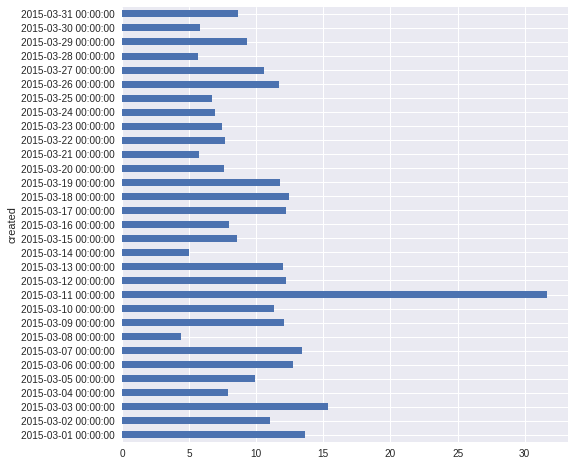

In [14]:
posts_groupby.mean().num_comments.plot(kind='barh', figsize=[8,8])

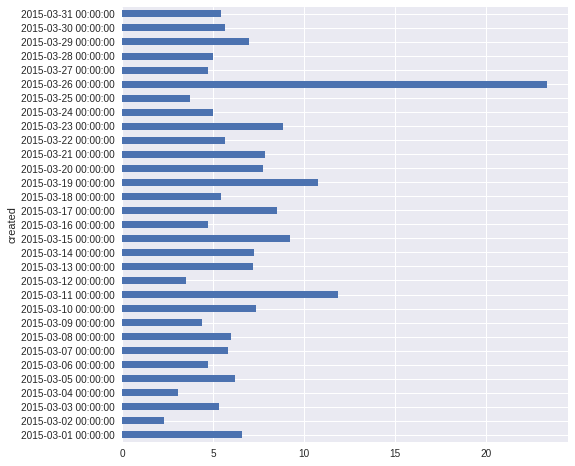

In [15]:
posts_groupby.mean().ups.plot(kind='barh', figsize=[8,8])